# PCA textbook

In [1]:
import numpy as np
from scipy import linalg as la

# create dataset
data=np.array([[7., 4., 3.],
               [4., 1., 8.],
               [6., 3., 5.],
               [8., 6., 1.],
               [8., 5., 7.],
               [7., 2., 9.],
               [5., 3., 3.],
               [9., 5., 8.],
               [7., 4., 5.],
               [8., 2., 2.]])

1. Calculate covariance matrix

In [4]:
# center the data
data -= data.mean(axis=0)
cov = np.cov(data, rowvar=False)

2. Calculate eigenvalues and eigenvector of the covar matrix

In [5]:
evals, evecs = la.eig(cov)
print("Eigenvalues: ", evals)
print("Eigenvector: ", evecs)

Eigenvalues:  [0.74992815+0.j 3.67612927+0.j 8.27394258+0.j]
Eigenvector:  [[-0.70172743  0.69903712 -0.1375708 ]
 [ 0.70745703  0.66088917 -0.25045969]
 [ 0.08416157  0.27307986  0.95830278]]


3. Multiply the original data matrix by the Eigenvector matrix. Sort the eigenvalues and select components

In [6]:
num_components = 2
sorted_key = np.argsort(evals)[::-1][:num_components]
evals, evecs = evals[sorted_key], evecs[:, sorted_key]
print("Sorted and selected eigenvalues: ", evals)
print("Sorted and selected eigenvector: ", evecs)

# multiply original data by eigenvector
principal_components = np.dot(data,evecs)
print("Principal components: ", principal_components)

Sorted and selected eigenvalues:  [8.27394258+0.j 3.67612927+0.j]
Sorted and selected eigenvector:  [[-0.1375708   0.69903712]
 [-0.25045969  0.66088917]
 [ 0.95830278  0.27307986]]
Principal components:  [[-2.15142276 -0.17311941]
 [ 3.80418259 -2.88749898]
 [ 0.15321328 -0.98688598]
 [-4.7065185   1.30153634]
 [ 1.29375788  2.27912632]
 [ 4.0993133   0.1435814 ]
 [-1.62582148 -2.23208282]
 [ 2.11448986  3.2512433 ]
 [-0.2348172   0.37304031]
 [-2.74637697 -1.06894049]]


# Creating and fitting a PCA model

Import 

In [7]:
import pandas as pd
from sklearn.decomposition import PCA

Create dataset

In [8]:
data = np.array([[7., 4., 3.],
               [4., 1., 8.],
               [6., 3., 5.],
               [8., 6., 1.],
               [8., 5., 7.],
               [7., 2., 9.],
               [5., 3., 3.],
               [9., 5., 8.],
               [7., 4., 5.],
               [8., 2., 2.]])

Create and fit PCA model

In [10]:
pca_model = PCA(n_components=2)
components = pca_model.fit_transform(data)

components_df = pd.DataFrame(data = components, 
                                       columns = ['principal_component_1', 'principal_component_2'])

components_df

,principal_component_1,principal_component_2
0,2.151423,-0.173119
1,-3.804183,-2.887499
2,-0.153213,-0.986886
3,4.706518,1.301536
4,-1.293758,2.279126
5,-4.099313,0.143581
6,1.625821,-2.232083
7,-2.114490,3.251243
8,0.234817,0.373040
9,2.746377,-1.068940


# Finding number of clusters

### The Elbow Method

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Create a dataframe

In [12]:
data = pd.DataFrame({"X":[12,15,18,10,8,9,12,20],
             "Y":[6,16,17,8,7,6,9,18]})

Run a loop for different values for the number of clusters

In [14]:
wcss_list = []

for i in range(1,6):
    # create and fit KMeans model
    kmeans_model = KMeans(n_clusters=i, random_state=123)
    kmeans_model.fit(data)
    # add the WCSS (the intertia of the clusters) to the score_list
    wcss_list.append(kmeans_model.inertia_)

Plot

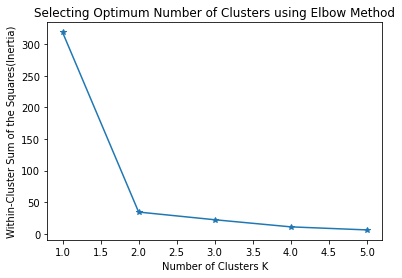

In [15]:
plt.plot(range(1,6), wcss_list, marker='*')
plt.title('Selecting Optimum Number of Clusters using Elbow Method')
plt.xlabel('Number of Clusters K')
plt.ylabel('Within-Cluster Sum of the Squares(Inertia)')
plt.show()

### Silhouette Method

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Create dataframe

In [17]:
data=pd.DataFrame({"X":[12,15,18,10,8,9,12,20],
             "Y":[6,16,17,8,7,6,9,18]})

Run loop for different values for number of clusters

In [19]:
score_list = []

for i in range(2, 6):
    # Create and fit the KMeans model
    kmeans_model = KMeans(n_clusters = i, random_state = 123)
    kmeans_model.fit(data)

    # Predict
    pred = kmeans_model.predict(data)

    # Calculate the Silhouette Score
    score = silhouette_score(data, pred, metric='euclidean')

    # Append Silhouette Score of the clusters to list
    score_list.append(score)

Plot

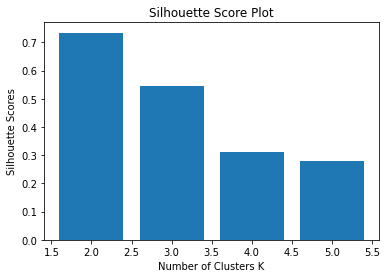

In [20]:
plt.bar(range(2, 6), score_list)
plt.title('Silhouette Score Plot')
plt.xlabel('Number of Clusters K')
plt.ylabel('Silhouette Scores')
plt.show()

# K-Means clustering

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Create dataframe

In [22]:
data = pd.DataFrame({"X":[12,15,18,10,8,9,12,20],
             "Y":[6,16,17,8,7,6,9,18]})
data

,X,Y
0,12,6
1,15,16
2,18,17
3,10,8
4,8,7
5,9,6
6,12,9
7,20,18


Define number of clusters

In [23]:
num_clusters = 2

# Create and fit the KMEans model

In [24]:
km = KMeans(n_clusters=num_clusters)
km.fit(data)

KMeans(n_clusters=2)

Predict

In [25]:
pred = km.predict(data)

Plot clusters

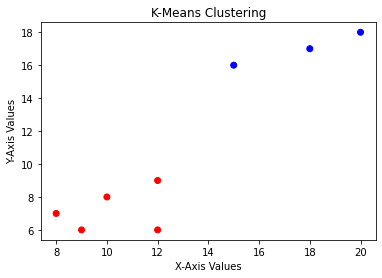

In [26]:
plt.scatter(data.X, data.Y, c=pred, marker='o', cmap='bwr_r')
plt.title('K-Means Clustering')
plt.xlabel('X-Axis Values')
plt.ylabel('Y-Axis Values')
plt.show()

# Hierarchical Clustering

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage

Create dataframe

In [29]:
data=pd.DataFrame({"X":[12,15,18,10,8,9,12,20],
             "Y":[6,16,17,8,7,6,9,18]})

Create dendogram (using ward linkage)

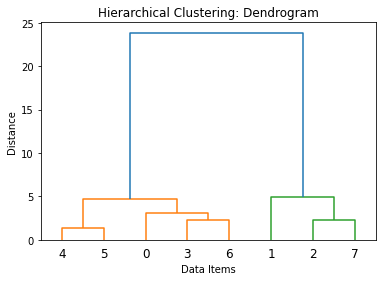

In [30]:
dendrogram_plot = dendrogram(linkage(data,method='ward'))

plt.title('Hierarchical Clustering: Dendrogram')
plt.xlabel('Data Items')
plt.ylabel('Distance')
plt.show()